In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

In [2]:
df_summ_weather = pd.read_csv('./data/Summary of Weather.csv')
df_summ_weather

C:\Users\Javo\AppData\Local\Temp\ipykernel_14268\2669700627.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_summ_weather = pd.read_csv('./data/Summary of Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,0,NaN,NaN,83.0,65.0,74.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,12,28,0.39,NaN,NaN,85.0,65.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,12,29,0,NaN,NaN,83.0,65.0,74.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,0,NaN,NaN,83.0,65.0,74.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_weather_stations = pd.read_csv('./data/Weather Station Locations.csv')
df_weather_stations

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333
...,...,...,...,...,...,...,...,...
156,33109,EL AQUINA,TS,3651N,01015E,4,36.850000,10.016667
157,33121,EL DJEM,TS,3520N,01040E,9999,35.333333,10.066667
158,33003,SISI AHMED,TS,3712N,00950E,4,37.200000,9.083333
159,33307,ADANA,TU,3659N,03518E,20,36.983333,35.016667


En `df_summ_weather` hay advertencias por problemas de tipo

In [4]:
df_summ_weather.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [5]:
df_summ_weather = df_summ_weather.dropna(axis=1, how='all') # Elimino todas las columnas que tengan NaN en todos sus registros
df_summ_weather.describe() # Descripción del dataset "limpio"

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,PGT
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,525.000000
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,12.085333
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,5.731328
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,0.000000
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,8.500000
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,11.600000
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,15.000000
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,23.900000


In [6]:
len(df_summ_weather["STA"].unique())

159

In [7]:
sta_selected = int(df_weather_stations.sample()["WBAN"]) # Selecciono una estación random, soy indeciso
sta_selected # 32907

31101

In [8]:
df_summ_weather_sta = df_summ_weather.merge(df_weather_stations.rename(columns={'WBAN': 'STA'}), on="STA")
df_summ_sta_selected = df_summ_weather_sta[df_summ_weather_sta["STA"] == 32907]
df_summ_sta_selected

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
78252,32907,1943-5-11,0,NaN,33.333333,23.888889,28.888889,0.0,NaN,43,5,11,0,NaN,NaN,92.0,75.0,84.0,0.0,NaN,NaN,NaN,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667
78253,32907,1943-5-12,0,NaN,27.222222,24.444444,25.555556,0.0,NaN,43,5,12,NaN,NaN,NaN,81.0,76.0,78.0,0.0,NaN,NaN,NaN,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667
78254,32907,1943-5-13,0,NaN,25.000000,23.888889,24.444444,0.0,NaN,43,5,13,NaN,NaN,NaN,77.0,75.0,76.0,0.0,NaN,NaN,NaN,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667
78255,32907,1943-5-14,0,NaN,26.666667,21.111111,23.888889,0.0,NaN,43,5,14,NaN,NaN,NaN,80.0,70.0,75.0,0.0,NaN,NaN,NaN,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667
78256,32907,1943-5-15,0,NaN,30.555556,24.444444,27.777778,0.0,NaN,43,5,15,NaN,NaN,NaN,87.0,76.0,82.0,0.0,NaN,NaN,NaN,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78998,32907,1945-5-27,30.988,NaN,26.666667,20.555556,23.333333,0.0,NaN,45,5,27,1.22,NaN,NaN,80.0,69.0,74.0,0.0,NaN,NaN,NaN,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667
78999,32907,1945-5-28,4.572,NaN,30.555556,20.000000,25.555556,0.0,NaN,45,5,28,0.18,NaN,NaN,87.0,68.0,78.0,0.0,NaN,NaN,NaN,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667
79000,32907,1945-5-29,12.954,NaN,28.888889,20.555556,24.444444,0.0,NaN,45,5,29,0.51,NaN,NaN,84.0,69.0,76.0,0.0,NaN,NaN,NaN,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667
79001,32907,1945-5-30,3.302,NaN,30.000000,20.555556,25.555556,0.0,NaN,45,5,30,0.13,NaN,NaN,86.0,69.0,78.0,0.0,NaN,NaN,NaN,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667


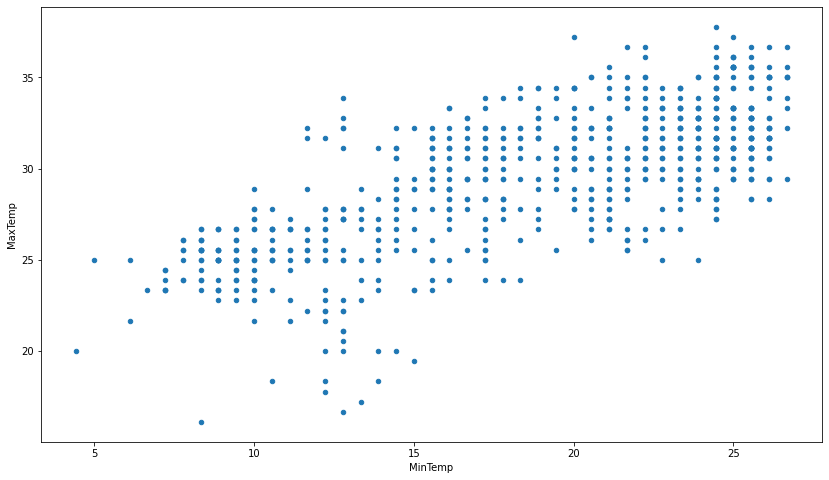

In [36]:
plt.rcParams['figure.figsize'] = [14, 8]
df_summ_sta_selected.plot.scatter(x="MinTemp", y="MaxTemp");

In [28]:
regresion_lineal = LinearRegression()
maxtemp = np.array(df_summ_sta_selected["MaxTemp"]) # Y
mintemp = np.array(df_summ_sta_selected["MinTemp"]).reshape(-1, 1) # X
regresion_lineal.fit(X=mintemp, y=maxtemp)

LinearRegression()

In [25]:
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [0.47681004], b = 20.604813771964068


In [29]:
maxtemp_pred = regresion_lineal.predict(mintemp)
mse = mean_squared_error(y_true=maxtemp, y_pred=maxtemp_pred)
rmse = np.sqrt(mse) # La raíz cuadrada del MSE es el RMSE

print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 6.733388841692501
Raíz del Error Cuadrático Medio (RMSE) = 2.5948774232499887


In [30]:
regresion_lineal.score?

In [31]:
r2 = regresion_lineal.score(mintemp, maxtemp)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.5265957915235171


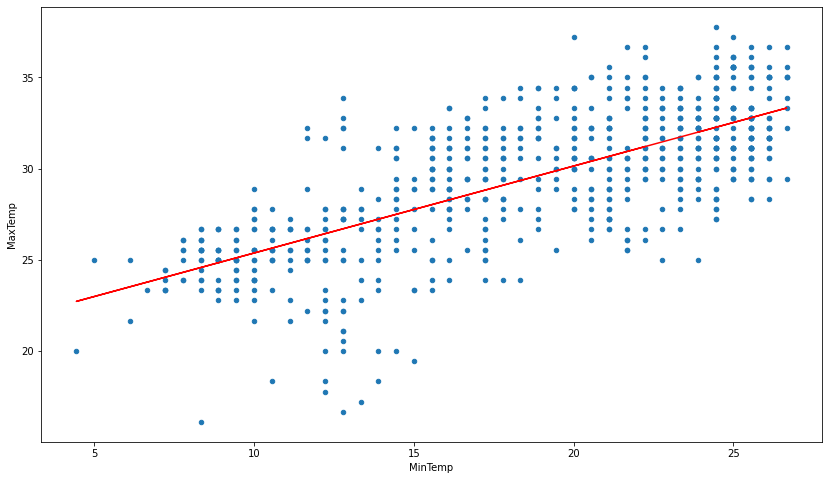

In [34]:
plt.rcParams['figure.figsize'] = [14, 8]
df_summ_sta_selected.plot.scatter(x="MinTemp", y="MaxTemp")
plt.plot(mintemp, maxtemp_pred, color='red')
plt.show()